# Neural network

In [11]:
!pip install tensorflow
!pip install pandas scikit-learn keras


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense


#insert file_path for the data
#file_path = 'H:/Documents/Merged data ANN.xlsx'
#file_path = 'C:/Users/Vince Van Ham/OneDrive/Documenten/kuleuven/Thesis/Merged data ANN.xlsx'
file_path = 'H:/Documents/FINAL_MERGED_DATASET.xlsx'
#read data, and quickly check if it is correctly read in
data= pd.read_excel(file_path)
# Load the data from Excel

#data.drop(columns=["date"], inplace=True)


In [13]:
data_copy=data.copy()

# Recurrent Neural Network

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense



# Separate features and target variable
#X = data.drop(columns=["price"])  # Features
#y = data["price"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape features into sequences for RNN
n_steps = 3  # You can adjust this number based on your preference
X_train_seq = np.array([X_train_scaled[i:i+n_steps, :] for i in range(len(X_train_scaled) - n_steps + 1)])
X_test_seq = np.array([X_test_scaled[i:i+n_steps, :] for i in range(len(X_test_scaled) - n_steps + 1)])

# Reshape target variable accordingly
y_train_seq = y_train[n_steps - 1:]
y_test_seq = y_test[n_steps - 1:]

# Build the RNN model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(n_steps, X_train_scaled.shape[1])))

# Add another LSTM layer
model.add(LSTM(units=64, activation='relu'))

# Add additional dense layers
model.add(Dense(units=32, activation='relu'))  # You can adjust the number of units and activation function as needed
model.add(Dense(units=16, activation='relu'))  # Another dense layer for further abstraction


model.add(Dense(units=1))  # Output layer, no activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print("Mean Absolute Error on Test Set:", mae)

# Make predictions
predictions = model.predict(X_test_seq)

# Additional evaluation metrics
mse = mean_squared_error(y_test_seq, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_seq, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Epoch 1/50
4059/4059 [==============================] - 19s 4ms/step - loss: 5174.7700 - mse: 5174.7700
Epoch 2/50
4059/4059 [==============================] - 16s 4ms/step - loss: 3810.3223 - mse: 3810.3223
Epoch 3/50
4059/4059 [==============================] - 16s 4ms/step - loss: 3399.0327 - mse: 3399.0327
Epoch 4/50
4059/4059 [==============================] - 16s 4ms/step - loss: 3004.2288 - mse: 3004.2288
Epoch 5/50
4059/4059 [==============================] - 16s 4ms/step - loss: 2676.6230 - mse: 2676.6230
Epoch 6/50
4059/4059 [==============================] - 16s 4ms/step - loss: 2408.4783 - mse: 2408.4783
Epoch 7/50
4059/4059 [==============================] - 16s 4ms/step - loss: 2179.3594 - mse: 2179.3594
Epoch 8/50
4059/4059 [==============================] - 16s 4ms/step - loss: 2010.5852 - mse: 2010.5852
Epoch 9/50
4059/4059 [==============================] - 16s 4ms/step - loss: 1875.6307 - mse: 1875.6307
Epoch 10/50
4059/4059 [==============================] - 16s 4ms

In [9]:
print("Shapes of input data:")
print("X_train_spatial_cnn:", X_train_spatial_cnn.shape)
print("X_test_spatial_cnn:", X_test_spatial_cnn.shape)
print("X_train_temporal_rnn:", X_train_temporal_rnn.shape)
print("X_test_temporal_rnn:", X_test_temporal_rnn.shape)


Shapes of input data:
X_train_spatial_cnn: (129876, 1, 27)
X_test_spatial_cnn: (32469, 1, 27)
X_train_temporal_rnn: (129874, 3, 150)
X_test_temporal_rnn: (32467, 3, 150)


## k-fold cross validation

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming X and y are defined

# Define the number of folds for cross-validation
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics across folds
mse_scores = []
rmse_scores = []
r2_scores = []

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features into sequences for RNN
n_steps = 3  # You can adjust this number based on your preference
X_seq = np.array([X_scaled[i:i+n_steps, :] for i in range(len(X_scaled) - n_steps + 1)])

# Reshape target variable accordingly
y_seq = y[n_steps - 1:]

# Define the RNN model
def build_model():
    model = Sequential()
    model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(n_steps, X_scaled.shape[1])))
    model.add(LSTM(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_seq):
    X_train, X_test = X_seq[train_index], X_seq[test_index]
    y_train, y_test = y_seq[train_index + n_steps - 1], y_seq[test_index + n_steps - 1]
    
    model = build_model()
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
    
    # Evaluate the model
    loss, mse = model.evaluate(X_test, y_test)
    mse_scores.append(mse)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate additional evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calculate average scores across folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

print("Average Mean Squared Error:", avg_mse)
print("Average Root Mean Squared Error:", avg_rmse)
print("Average R-squared:", avg_r2)



Epoch 1/50
3383/3383 [==============================] - 15s 4ms/step - loss: 5262.7319 - mse: 5262.7319
Epoch 2/50
3383/3383 [==============================] - 13s 4ms/step - loss: 3661.1160 - mse: 3661.1160
Epoch 3/50
3383/3383 [==============================] - 13s 4ms/step - loss: 3158.1504 - mse: 3158.1504
Epoch 4/50
3383/3383 [==============================] - 13s 4ms/step - loss: 2757.8481 - mse: 2757.8481
Epoch 5/50
3383/3383 [==============================] - 13s 4ms/step - loss: 2417.3247 - mse: 2417.3247
Epoch 6/50
3383/3383 [==============================] - 13s 4ms/step - loss: 2136.0593 - mse: 2136.0593
Epoch 7/50
3383/3383 [==============================] - 13s 4ms/step - loss: 1937.1409 - mse: 1937.1409
Epoch 8/50
3383/3383 [==============================] - 13s 4ms/step - loss: 1770.3146 - mse: 1770.3146
Epoch 9/50
3383/3383 [==============================] - 13s 4ms/step - loss: 1629.7084 - mse: 1629.7084
Epoch 10/50
3383/3383 [==============================] - 13s 4ms

In [24]:
print("Shape of X_scaled:", X_scaled.shape)
print("First few rows of X_scaled:", X_scaled[:5])


Shape of X_scaled: (162345, 176)
First few rows of X_scaled: [[ 1.46239312e+00 -1.28220372e+00 -4.25865076e-01 -3.52799853e-01
  -3.64403366e-01  4.41902300e-01 -6.40942146e-01  3.98008061e-01
  -7.03876019e-01 -3.75739166e-01 -1.46270238e+00 -7.43749141e-01
  -5.76507590e-01  7.50950627e-01  6.00854768e-02 -1.32826650e-01
  -4.32976607e-02 -1.35949140e-01  9.61813823e-01  2.93523731e+00
   2.92741377e+00  7.65972252e-01  3.78874610e-01  3.57583375e-01
   4.00649973e-01  4.48174901e-01  4.63682713e-01  5.36565940e-01
   4.09797356e-01 -5.38058084e-01 -3.48469746e-01 -3.02039842e-01
  -4.23473586e-01  0.00000000e+00  1.85806171e+00 -4.45054909e-01
   1.48707586e+00  1.30354396e+00 -1.37955491e-01  1.96922876e+00
  -8.07515050e-01  2.19451563e+00 -2.22286854e-01 -1.21246209e-01
  -2.40361712e-01  1.42910234e+00 -1.38418430e-01 -5.64126129e-01
  -2.66161588e-01  2.35928221e-01  9.66455898e-01 -4.59736980e-01
  -6.63704833e-02  5.84346985e-01 -1.23012573e-01 -1.80820798e-01
  -3.52114827e-

# Combination of RNN and CNN

## first model

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate


# Separating the features and target variable
temporal_features_names = ['weekday', 'is_holiday', 'is_school_holiday', 'season_Autumn', 'season_Spring', 'season_Winter', 'season_Summer', 'year', 'month', 'day', 'day_of_year']
cnn_features = data.drop(['price'] + temporal_features_names, axis=1)
temporal_features = data[temporal_features_names]
target = data['price']

# Splitting dataset into training and testing sets
X_train_cnn, X_test_cnn, X_train_temporal, X_test_temporal, y_train, y_test = train_test_split(cnn_features, temporal_features, target, test_size=0.2, random_state=42)

# Normalizing the features
scaler_cnn = StandardScaler().fit(X_train_cnn)
X_train_cnn = scaler_cnn.transform(X_train_cnn)
X_test_cnn = scaler_cnn.transform(X_test_cnn)

scaler_temporal = StandardScaler().fit(X_train_temporal)
X_train_temporal = scaler_temporal.transform(X_train_temporal)
X_test_temporal = scaler_temporal.transform(X_test_temporal)

# Reshaping for CNN
X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

# Defining the model
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn_output = Dense(64, activation='relu')(cnn)

temporal_input = Input(shape=(X_train_temporal.shape[1],))
rnn = LSTM(64)(tf.expand_dims(temporal_input, -1))
rnn_output = Dense(64, activation='relu')(rnn)

combined = concatenate([cnn_output, rnn_output])
combined_dense = Dense(128, activation='relu')(combined)
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)

# Compilation of the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Summary of the model
model.summary()

# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with Early Stopping
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=100, batch_size=64,verbose=1, callbacks=[early_stopping])

# Training the model
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=20, batch_size=64)

# To train the model, uncomment the model.fit line above and adjust epochs and batch_size as needed.

# Evaluating the model on the test set
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)

# Printing performance measures
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 165, 1)]     0           []                               
                                                                                                  
 conv1d_11 (Conv1D)             (None, 163, 64)      256         ['input_19[0][0]']               
                                                                                                  
 input_20 (InputLayer)          [(None, 11)]         0           []                               
                                                                                                  
 max_pooling1d_11 (MaxPooling1D  (None, 81, 64)      0           ['conv1d_11[0][0]']              
 )                                                                                          

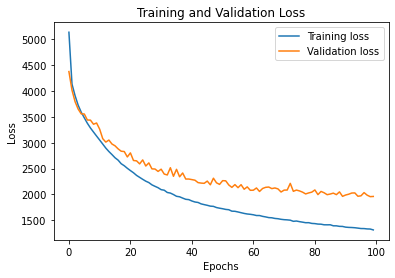

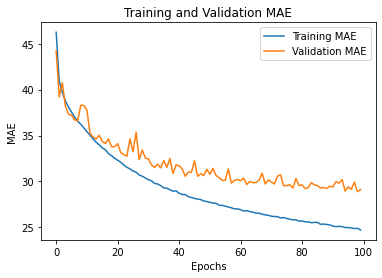

In [23]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


## out-of-time testing

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate
from tensorflow.keras.callbacks import EarlyStopping


# Assuming 'data' is your DataFrame and it already includes the necessary columns

# Combine day, month, and year into a single datetime column for filtering
#data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

data=data.drop(columns=["date", "first_review", "last_review", "host_since"], inplace=True)

# Get unique ids
all_ids = data['id'].unique()

# Split ids into training and testing sets
train_ids, test_ids = train_test_split(all_ids, test_size=0.3, random_state=42)

# Filter data based on selected ids
train_selected = data[data['id'].isin(train_ids)]
test_selected = data[data['id'].isin(test_ids)]

# Define the cutoff date for the out-of-time test
cutoff_date = pd.to_datetime('2023-09-12')  # Example: Adjust as needed

# Further split the dataset based on the cutoff date
train_data = train_selected[train_selected['date'] < cutoff_date]
test_data = test_selected[test_selected['date'] >= cutoff_date]

# Assuming these are your feature names
temporal_features_names = ['weekday', 'is_holiday', 'is_school_holiday', 'season']
                           
#                           'season_Autumn', 
#                           'season_Spring', 'season_Winter', 'season_Summer', 'year', 'month', 'day', 'day_of_year']

# Preparing features for the neural network
cnn_features_train = train_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_train = train_data[temporal_features_names]
y_train = train_data['price']

cnn_features_test = test_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_test = test_data[temporal_features_names]
y_test = test_data['price']

# Normalizing the features
scaler_cnn = StandardScaler().fit(cnn_features_train)
X_train_cnn = scaler_cnn.transform(cnn_features_train)
X_test_cnn = scaler_cnn.transform(cnn_features_test)

scaler_temporal = StandardScaler().fit(temporal_features_train)
X_train_temporal = scaler_temporal.transform(temporal_features_train)
X_test_temporal = scaler_temporal.transform(temporal_features_test)

# Reshaping for CNN
X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

# Neural network model definition
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn_output = Dense(64, activation='relu')(cnn)

temporal_input = Input(shape=(X_train_temporal.shape[1],))
rnn = LSTM(64)(tf.expand_dims(temporal_input, -1))
rnn_output = Dense(64, activation='relu')(rnn)

combined = concatenate([cnn_output, rnn_output])
combined_dense = Dense(128, activation='relu')(combined)
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)

# Compilation of the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model with Early Stopping
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=20, batch_size=64, verbose=1, callbacks=[early_stopping])

# Evaluating the model on the out-of-time test set
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)

# Printing performance measures
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate
from tensorflow.keras.callbacks import EarlyStopping

# Using 'data_copy' DataFrame instead of 'data'

# Combine day, month, and year into a single datetime column for filtering
#data_copy['date'] = pd.to_datetime(data_copy[['year', 'month', 'day']])

data_copy = data_copy.drop(columns=["date", "first_review", "last_review", "host_since"], inplace=True)

# Get unique ids
all_ids = data_copy['id'].unique()

# Split ids into training and testing sets
train_ids, test_ids = train_test_split(all_ids, test_size=0.3, random_state=42)

# Filter data based on selected ids
train_selected = data_copy[data_copy['id'].isin(train_ids)]
test_selected = data_copy[data_copy['id'].isin(test_ids)]

# Define the cutoff date for the out-of-time test
cutoff_date = pd.to_datetime('2023-09-12')  # Example: Adjust as needed

# Further split the dataset based on the cutoff date
train_data = train_selected[train_selected['date'] < cutoff_date]
test_data = test_selected[test_selected['date'] >= cutoff_date]

# Assuming these are your feature names
temporal_features_names = ['weekday', 'is_holiday', 'is_school_holiday', 'season']
# 'season_Autumn', 'season_Spring', 'season_Winter', 'season_Summer', 'year', 'month', 'day', 'day_of_year']

# Preparing features for the neural network
cnn_features_train = train_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_train = train_data[temporal_features_names]
y_train = train_data['price']

cnn_features_test = test_data.drop(['price', 'date', 'id'] + temporal_features_names, axis=1)
temporal_features_test = test_data[temporal_features_names]
y_test = test_data['price']

# Normalizing the features
scaler_cnn = StandardScaler().fit(cnn_features_train)
X_train_cnn = scaler_cnn.transform(cnn_features_train)
X_test_cnn = scaler_cnn.transform(cnn_features_test)

scaler_temporal = StandardScaler().fit(temporal_features_train)
X_train_temporal = scaler_temporal.transform(temporal_features_train)
X_test_temporal = scaler_temporal.transform(temporal_features_test)

# Reshaping for CNN
X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

# Neural network model definition
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn_output = Dense(64, activation='relu')(cnn)

temporal_input = Input(shape=(X_train_temporal.shape[1],))
rnn = LSTM(64)(tf.expand_dims(temporal_input, -1))
rnn_output = Dense(64, activation='relu')(rnn)

combined = concatenate([cnn_output, rnn_output])
combined_dense = Dense(128, activation='relu')(combined)
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)

# Compilation of the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model with Early Stopping
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=20, batch_size=64, verbose=1, callbacks=[early_stopping])

# Evaluating the model on the out-of-time test set
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)

# Printing performance measures
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## model with extra layers

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate, Dropout

# Assuming X_train_cnn, X_train_temporal, y_train have been defined as before

# CNN Branch for non-temporal features
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Conv1D(filters=128, kernel_size=3, activation='relu')(cnn)  # Extra Conv layer
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(128, activation='relu')(cnn)
cnn_output = Dense(64, activation='relu')(cnn)  # Extra Dense layer

# RNN Branch for Temporal Features
temporal_input = Input(shape=(X_train_temporal.shape[1],))
rnn = LSTM(64, return_sequences=True)(tf.expand_dims(temporal_input, -1))  # Making LSTM return sequences
rnn = LSTM(32)(rnn)  # Extra LSTM layer
rnn_output = Dense(64, activation='relu')(rnn)  # Adjusted Dense layer

# Combining the branches
combined = concatenate([cnn_output, rnn_output])
combined = Dense(128, activation='relu')(combined)
combined = Dropout(0.5)(combined)  # Added Dropout for regularization
combined_dense = Dense(64, activation='relu')(combined)  # Extra Dense layer before final output
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)

# Compilation of the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Model summary
model.summary()

# Training the model
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=1)
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=20, batch_size=64, verbose=1)


# Evaluating the model on the test set
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)

# Printing performance measures
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 165, 1)]     0           []                               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 163, 64)      256         ['input_7[0][0]']                
                                                                                                  
 max_pooling1d_2 (MaxPooling1D)  (None, 81, 64)      0           ['conv1d_2[0][0]']               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 79, 128)      24704       ['max_pooling1d_2[0][0]']        
                                                                                            

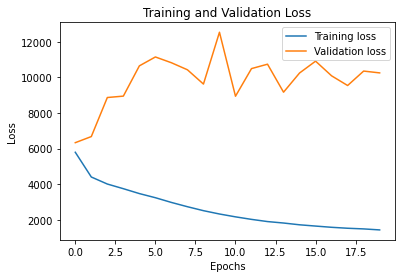

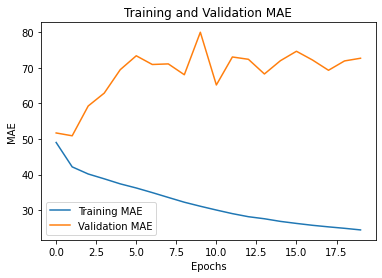

In [11]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## model with dropout, regularization and early stopping to prevent overftting

In [18]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Model definition
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Conv1D(filters=128, kernel_size=3, activation='relu')(cnn)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(128, activation='relu')(cnn)
cnn = Dropout(0.5)(cnn)  # Dropout added
cnn_output = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(cnn)  # L2 Regularization

temporal_input = Input(shape=(X_train_temporal.shape[1],))
rnn = LSTM(64, return_sequences=True)(tf.expand_dims(temporal_input, -1))
rnn = LSTM(32)(rnn)
rnn = Dropout(0.5)(rnn)  # Dropout added
rnn_output = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(rnn)  # L2 Regularization

combined = concatenate([cnn_output, rnn_output])
combined = Dense(128, activation='relu')(combined)
combined = Dropout(0.5)(combined)
combined_dense = Dense(64, activation='relu')(combined)
output = Dense(1, activation='linear')(combined_dense)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
model.summary()

# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with Early Stopping
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=100, batch_size=64,verbose=1, callbacks=[early_stopping])

# Evaluating the model on the test set
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)

# Printing performance measures
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')



Epoch 1/100
2030/2030 [==============================] - 173s 80ms/step - loss: 6134.3970 - mae: 50.9236 - mse: 6133.5200 - val_loss: 9345.3828 - val_mae: 60.4635 - val_mse: 9344.5938
Epoch 2/100
2030/2030 [==============================] - 160s 79ms/step - loss: 4593.8652 - mae: 43.6701 - mse: 4593.0708 - val_loss: 10270.0723 - val_mae: 62.8991 - val_mse: 10269.2637
Epoch 3/100
2030/2030 [==============================] - 146s 72ms/step - loss: 4341.6338 - mae: 42.3758 - mse: 4340.8081 - val_loss: 13063.3896 - val_mae: 73.3625 - val_mse: 13062.5371
Epoch 4/100
2030/2030 [==============================] - 147s 72ms/step - loss: 4145.8433 - mae: 41.4906 - mse: 4144.9741 - val_loss: 10481.6035 - val_mae: 64.8965 - val_mse: 10480.6982
Epoch 5/100
2030/2030 [==============================] - 147s 72ms/step - loss: 3975.2012 - mae: 40.6873 - mse: 3974.2788 - val_loss: 11238.5107 - val_mae: 66.6883 - val_mse: 11237.5605
Epoch 6/100
2030/2030 [==============================] - 160s 79ms/step 

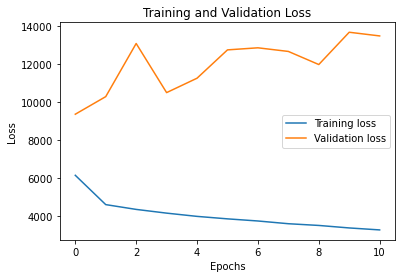

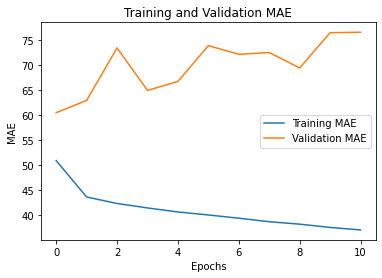

In [19]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## even more regularization and simplified model

In [16]:
from tensorflow.keras.layers import BatchNormalization

# Simplified model
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
cnn = Conv1D(filters=32, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(64, activation='relu', kernel_regularizer=l2(0.02))(cnn)  # Increased L2 regularization
cnn = Dropout(0.5)(cnn)
cnn_output = Dense(32, activation='relu', kernel_regularizer=l2(0.02))(cnn)

temporal_input = Input(shape=(X_train_temporal.shape[1],))
rnn = LSTM(32, return_sequences=True)(tf.expand_dims(temporal_input, -1))
rnn = Dropout(0.5)(rnn)
rnn = LSTM(16)(rnn)
rnn = Dense(32, activation='relu', kernel_regularizer=l2(0.02))(rnn)
rnn_output = Dropout(0.5)(rnn)

combined = concatenate([cnn_output, rnn_output])
combined = BatchNormalization()(combined)
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.5)(combined)
output = Dense(1, activation='linear')(combined)

model = Model(inputs=[cnn_input, temporal_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
model.summary()

# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training with Early Stopping
history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_split=0.3, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])
#history = model.fit([X_train_cnn, X_train_temporal], y_train, validation_data=([X_test_cnn, X_test_temporal], y_test), epochs=100, batch_size=64,verbose=1, callbacks=[early_stopping])

# Evaluating the model on the test set
test_loss, test_mae, test_mse = model.evaluate([X_test_cnn, X_test_temporal], y_test, verbose=1)

# Printing performance measures
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')



Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 165, 1)]     0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 11)]         0           []                               
                                                                                                  
 conv1d_7 (Conv1D)              (None, 163, 32)      128         ['input_13[0][0]']               
                                                                                                  
 tf.expand_dims_5 (TFOpLambda)  (None, 11, 1)        0           ['input_14[0][0]']               
                                                                                            

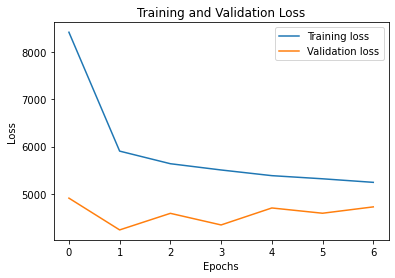

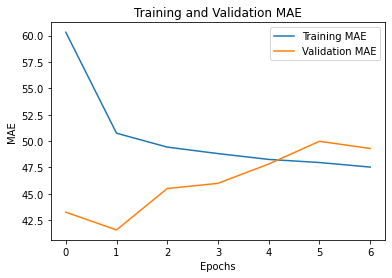

In [17]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# MultilayerPerceptron model

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

#insert file_path for the data
#file_path = 'H:/Documents/Merged data ANN.xlsx'
#read data, and quickly check if it is correctly read in
#data= pd.read_excel(file_path)
# Load the data from Excel

#data.drop(columns=["date"], inplace=True)

# Separate features and target variable
#X = data.drop(columns=["price"])  # Features
#y = data["price"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Multilayer Perceptron model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=32, activation='relu'))

#additional hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Mean Absolute Error on Test Set:", mae)

# Make predictions
predictions = model.predict(X_test_scaled)

# Additional evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Epoch 1/50
2030/2030 [==============================] - 4s 1ms/step - loss: 5567.8525 - mse: 5567.8525
Epoch 2/50
2030/2030 [==============================] - 3s 1ms/step - loss: 3883.0486 - mse: 3883.0486
Epoch 3/50
2030/2030 [==============================] - 3s 2ms/step - loss: 3684.4263 - mse: 3684.4263
Epoch 4/50
2030/2030 [==============================] - 3s 1ms/step - loss: 3522.7344 - mse: 3522.7344
Epoch 5/50
2030/2030 [==============================] - 3s 1ms/step - loss: 3379.0938 - mse: 3379.0938
Epoch 6/50
2030/2030 [==============================] - 3s 1ms/step - loss: 3249.0664 - mse: 3249.0664
Epoch 7/50
2030/2030 [==============================] - 3s 1ms/step - loss: 3119.2424 - mse: 3119.2424
Epoch 8/50
2030/2030 [==============================] - 3s 1ms/step - loss: 3012.1328 - mse: 3012.1328
Epoch 9/50
2030/2030 [==============================] - 3s 2ms/step - loss: 2896.9395 - mse: 2896.9395
Epoch 10/50
2030/2030 [==============================] - 3s 1ms/step - lo

### kfold-cross validation

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

# Load the data from Excel
# Load the data from Excel
# data.drop(columns=["date"], inplace=True)

# Separate features and target variable
# X = data.drop(columns=["price"])  # Features
# y = data["price"]  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

mse_scores = []
rmse_scores = []
r2_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Build the Multilayer Perceptron model
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=32, activation='relu'))

    # Additional hidden layers
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(units=1))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

    # Evaluate the model
    loss, mse = model.evaluate(X_test, y_test, verbose=1)
    predictions = model.predict(X_test)

    # Calculate additional evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calculate average scores across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

print("Average Mean Squared Error:", avg_mse)
print("Average Root Mean Squared Error:", avg_rmse)
print("Average R-squared:", avg_r2)


1015/1015 [==============================] - 1s 944us/step
Average Mean Squared Error: 2171.663427734375
Average Root Mean Squared Error: 46.599229684386465
Average R-squared: 0.8490474173334949


# CNN

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

#insert file_path for the data
#file_path = 'H:/Documents/Merged data ANN.xlsx'
#read data, and quickly check if it is correctly read in
#data= pd.read_excel(file_path)
# Load the data from Excel

#data.drop(columns=["date"], inplace=True)

# Separate features and target variable
#X = data.drop(columns=["price"])  # Features
#y = data["price"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN (add an additional dimension)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

#extra hidden layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))


model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test_reshaped, y_test)
print("Mean Absolute Error on Test Set:", mae)

# Make predictions
predictions = model.predict(X_test_reshaped)

# Additional evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Epoch 1/50
4059/4059 [==============================] - 25s 6ms/step - loss: 5182.0083 - mae: 47.0001
Epoch 2/50
4059/4059 [==============================] - 24s 6ms/step - loss: 4110.0288 - mae: 40.7656
Epoch 3/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3888.7305 - mae: 39.6066
Epoch 4/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3722.6101 - mae: 38.6810
Epoch 5/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3577.6919 - mae: 37.8857
Epoch 6/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3455.2400 - mae: 37.2726
Epoch 7/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3340.5276 - mae: 36.6472
Epoch 8/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3207.7732 - mae: 35.9574
Epoch 9/50
4059/4059 [==============================] - 24s 6ms/step - loss: 3091.1262 - mae: 35.3685
Epoch 10/50
4059/4059 [==============================] - 24s 6ms/step - loss: 2990

# GraphCNN

In [14]:
!pip install pandas numpy scikit-learn keras spektral

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Model
from keras.layers import Input, Dense
from spektral.layers import GraphConv


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the GraphCNN model
input_layer = Input(shape=(X_train_scaled.shape[1],))
graph_conv = GraphConv(64, activation='relu')([input_layer, input_layer])
dense1 = Dense(units=32, activation='relu')(graph_conv)
output_layer = Dense(units=1)(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Mean Absolute Error on Test Set:", mae)

# Make predictions
predictions = model.predict(X_test_scaled)

# Additional evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


ImportError: cannot import name 'GraphConvS' from 'spektral.layers' (C:\Program Files\Anaconda3\lib\site-packages\spektral\layers\__init__.py)